In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from utils import *

import pandas as pd
from gaussian_process_models.experiments import exp1

from building_availability_matrices.utils import (
    NO_CLIENTS,
    CORR,
    UNCORR,
    CORR_FT,
    UNCORR_FT,
)

In [2]:
# Number of FL training rounds:
n_rounds = 100

# Common carbon budget
global_carbon_budget = 7 # kgCO2e

# Uniform carbon budget
carbon_budget = 1 # kgCO2eq

# list of countries/clients:
countries = [i+1 for i in range(NO_CLIENTS)]

main_folder = 'availability_matrices/av-mat-4'

formatted_array = list(range(n_rounds))

In [3]:
res = exp1(freq1=0.25, k=10, seq_len=n_rounds, n_clients=NO_CLIENTS)

2024-10-10 11:06:15.096571: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-10 11:06:15.099968: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-10 11:06:15.111266: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-10 11:06:15.129478: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-10 11:06:15.134741: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-10 11:06:15.147915: I tensorflow/core/platform/cpu_feature_gu

In [4]:
# Correlated case

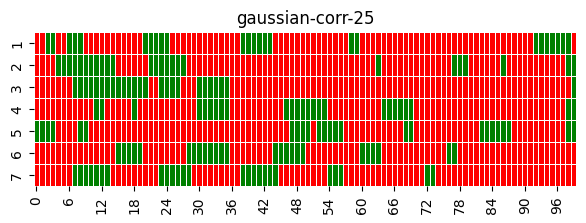

In [4]:
res_corr = res[CORR]
folder = main_folder
key_word = 'gaussian-corr-25'

availability_matrix = pd.DataFrame(res_corr, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

In [5]:
from utils import lambda_2

In [6]:
print(list(lambda_2(seq=seq) for seq in res_corr))

[0.6789189189189191, 0.7116666666666667, 0.8216666666666668, 0.7116666666666667, 0.6699999999999999, 0.7324324324324325, 0.7324324324324325]


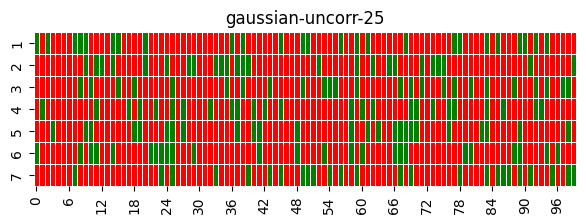

In [7]:
res_corr = res[UNCORR]
folder = main_folder
key_word = 'gaussian-uncorr-25'

availability_matrix = pd.DataFrame(res_corr, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

In [8]:
print(list(lambda_2(seq=seq) for seq in res_corr))

[-0.00324324324324321, 0.16166666666666663, -0.17729729729729726, -0.12378378378378374, 0.14378378378378365, 0.15729729729729724, -0.05833333333333335]


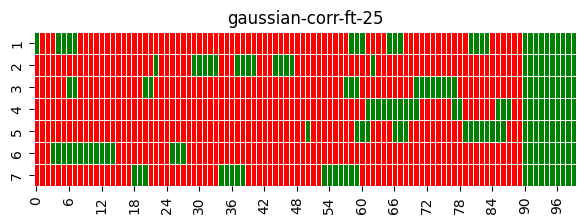

In [9]:
res_corr = res[CORR_FT]
folder = main_folder
key_word = 'gaussian-corr-ft-25'

availability_matrix = pd.DataFrame(res_corr, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

In [10]:
print(list(lambda_2(seq=seq) for seq in res_corr))

[0.7250000000000001, 0.7116666666666667, 0.7666666666666666, 0.8216666666666668, 0.7666666666666666, 0.8766666666666665, 0.8216666666666668]


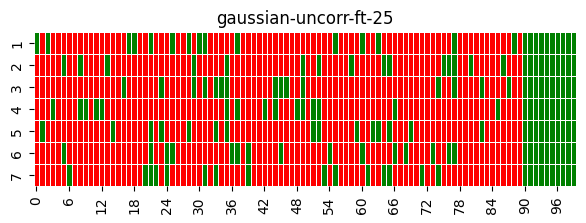

In [11]:
res_corr = res[UNCORR_FT]
folder = main_folder
key_word = 'gaussian-uncorr-ft-25'

availability_matrix = pd.DataFrame(res_corr, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

In [12]:
print(list(lambda_2(seq=seq) for seq in res_corr))

[0.2849999999999999, 0.32666666666666666, 0.3816666666666666, 0.3816666666666666, 0.2716666666666667, 0.32666666666666666, 0.32666666666666666]


In [13]:
!cp availability_matrices/av-mat-4/av-mat_gaussian-*25.csv ../availability_matrices